<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Traditional/Unsupervised/Jack_KMEANS_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-MEANS Unsupervised Learning**

In [13]:
# Import all needed libraries
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import pandas as pd

In [3]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the images (convert each 28x28 image to a 784-dimensional vector)
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Normalize the pixel values to range [0, 1]
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Standardize the data
# Adjust the data so that it has a mean (average) of 0 and a standard deviation of 1.
# Ensures that the model treats all features equally, which is important for its performance.
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Set the number of clusters to the number of classes (10 for Fashion MNIST)
# Initialize a K-Means clustering model. Specify that we want to group the data into 10 clusters because there are 10 different types of clothing
# in the Fashion MNIST dataset. random_state=42 ensures that the results can be reproduced every time you run the code.
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the K-Means model on the training data
# Train the K-Means model using the flattened training images.
# Analyzes the training data to figure out how to group the images into clusters based on their similarities.
kmeans.fit(x_train_flat)

# Predict the cluster for each data point in the test set
# Use the trained K-Means model to assign each test image to one of the 10 clusters. The result, stored in y_kmeans, tells us which cluster
# (or group) each test image belongs to, based on the patterns the model learned during training.
y_kmeans = kmeans.predict(x_test_flat)


**K-MEANS CLUSTERING**

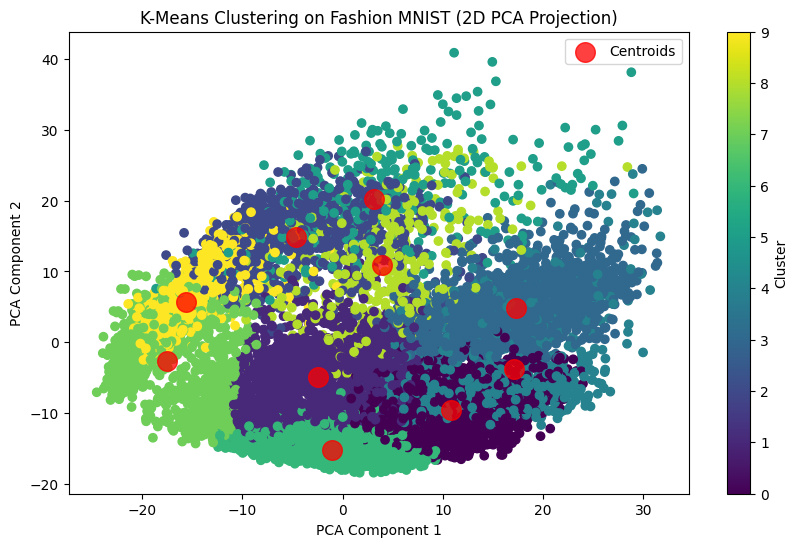

In [5]:
# Reduce the dimensionality of the data to 2D for visualization
pca = PCA(n_components=2)

# The PCA model is applied to the flattened test images, converting them into a 2D representation.
# The result is stored in x_test_pca, where each image is now represented by two numbers instead of 784.
x_test_pca = pca.fit_transform(x_test_flat)

# Plot the clustered data points
# Create a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot of the 2D data points from x_test_pca.
# Each point is colored based on its assigned cluster (from y_kmeans), using the 'viridis' color map. The points are represented as circular markers.
scatter = plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o')

# Add a color bar to the side of the plot, indicating which colors correspond to which clusters. It helps interpret the colors used in the scatter plot.
plt.colorbar(scatter, label='Cluster')

# Optionally, plot the cluster centers after PCA transformation
# Convert the cluster centers (the average positions of the clusters found by K-Means) into the 2D space using the same PCA transformation.
# This helps in visualizing where the centers of each cluster are in the reduced dimension.
centers_pca = pca.transform(kmeans.cluster_centers_)

# Cluster centers are plotted as larger red dots on the scatter plot, making them easily distinguishable.
# The s=200 makes them bigger, alpha=0.75 gives them some transparency
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, label='Centroids')

# Set the title
plt.title("K-Means Clustering on Fashion MNIST (2D PCA Projection)")

# Set the x-axis lable
plt.xlabel("PCA Component 1")

# Set the y-axis label
plt.ylabel("PCA Component 2")

# Add a legend
plt.legend()

# Display the figure
plt.show()

**CLUSTER DISTRIBUTION**

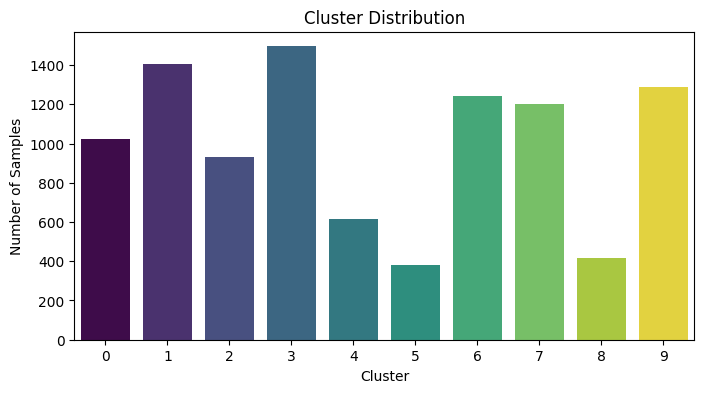

In [10]:
# Count the number of samples in each cluster
# Use np.unique to find all the unique clusters assigned by K-Means (stored in y_kmeans) and counts how many samples belong to each cluster.
# The results are stored in unique (the cluster labels) and counts (the number of samples in each cluster).
unique, counts = np.unique(y_kmeans, return_counts=True)

# Plot the distribution of samples across clusters
# Create a figure
plt.figure(figsize=(8, 4))

# Bar plot is generated using Seaborn (sns). The x-axis shows the different clusters (unique), and the y-axis shows the number of samples
# in each cluster (counts). palette='viridis' sets the colors of the bars using the 'viridis' color scheme.
sns.barplot(x=unique, y=counts, hue=unique, palette='viridis', legend=False)

# Set the title
plt.title("Cluster Distribution")

# Set the x-axis label
plt.xlabel("Cluster")

# Set the y-axis label
plt.ylabel("Number of Samples")

# Display the figure
plt.show()

In [11]:
# For each cluster, find the most frequent true label (mode)
# Create an empty array called labels with the same shape as y_kmeans. This array will hold the most common true label for each cluster.
labels = np.zeros_like(y_kmeans)

# Loop through each cluster
for i in range(10):  # Assuming 10 clusters
    #  Mask is a boolean array that is True where the predictions (y_kmeans) match the current cluster index i.
    # This helps in selecting only the samples that belong to this cluster.
    mask = (y_kmeans == i)

    # Mode function finds the most common (frequent) true label from the original test labels (y_test) for the samples in the current cluster.
    # This frequent label is then assigned to the corresponding positions in the labels array.
    labels[mask] = mode(y_test[mask])[0]

# Calculate accuracy by comparing most frequent labels in clusters to true labels
# Compare the newly assigned labels (most frequent labels per cluster) to the true labels in y_test.
# It calculates how many labels match, giving you an accuracy score.
accuracy = accuracy_score(y_test, labels)

# Print the accuracy as a percentage, showing how well the clustering aligns with the true labels.
print(f"Cluster accuracy: {accuracy * 100:.2f}%")

Cluster accuracy: 58.44%


**DISTRIBUTION OF TRUE LABELS ACROSS CLUSTERS**

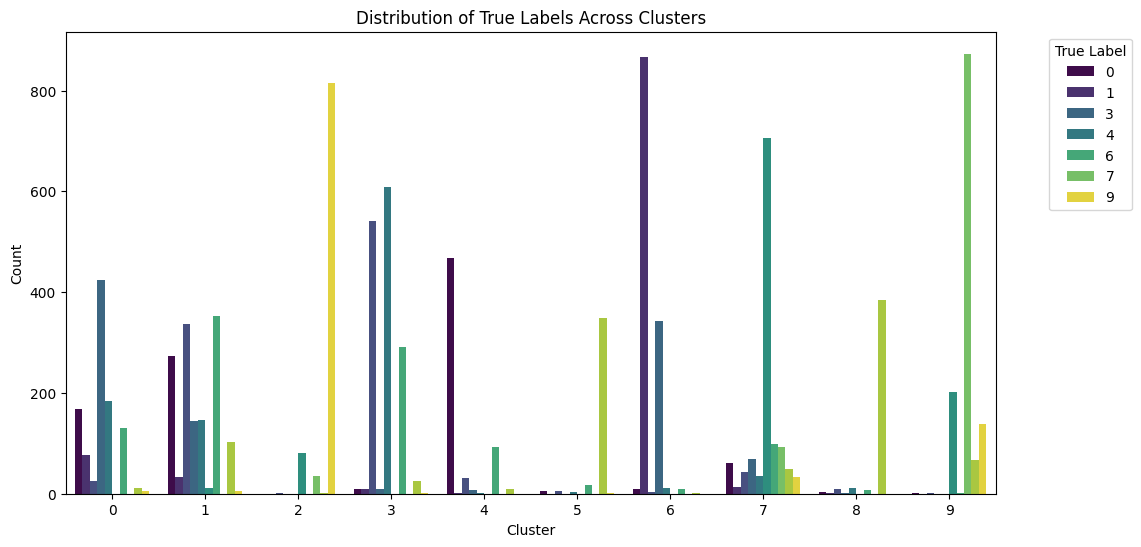

In [14]:
# Create a DataFrame to visualize the true labels for each cluster
cluster_labels_df = pd.DataFrame({'Cluster': y_kmeans, 'True Label': y_test})

# Plot the distribution of true labels for each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_labels_df, x='Cluster', hue='True Label', palette='viridis')
plt.title('Distribution of True Labels Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='True Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# Assign names to clusters (after some analysis of the clusters)
cluster_names = {
    0: "Mostly T-shirts",
    1: "Mostly Trousers",
    2: "Mostly Pullovers",
    3: "Mostly Dresses",
    4: "Mostly Coats",
    5: "Mostly Sandals",
    6: "Mostly Shirts",
    7: "Mostly Sneakers",
    8: "Mostly Bags",
    9: "Mostly Ankle boots"
}

# Define the label names for the Fashion MNIST dataset
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


**VISUAL COMPARISON OF PREDICTED CLUSTER NAMES AND TRUE LABELS**

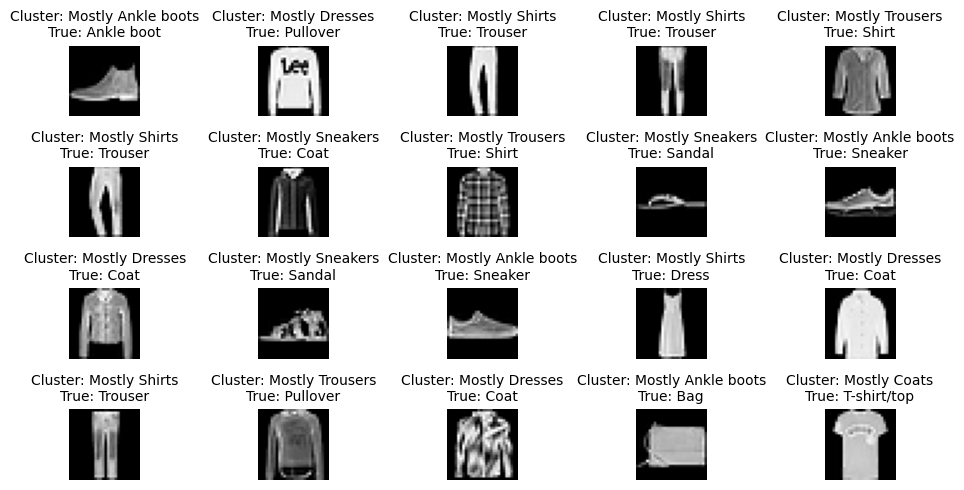

In [18]:
# Display a few images with their predicted cluster names and true labels
# Create a figure
plt.figure(figsize=(10, 5))

# Start a loop to go through image
for i in range(20):  # Display 20 images
    # For each image, create a small section (subplot) in the figure, arranged in a grid of 4 rows and 5 columns.
    # The i + 1 ensures that each image gets its own spot
    plt.subplot(4, 5, i + 1)

    # Show the current image in grayscale. The image data is reshaped from a flat array back to its original size of 28 by 28 pixels for proper display.
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Get the predicted cluster name and the true label name
    # pred_cluster_name retrieves the name of the predicted cluster for the current image from the cluster_names list using the index from y_kmeans.
    pred_cluster_name = cluster_names[y_kmeans[i]]
    # true_label_name gets the actual label name for the image from the label_names list using the index from y_test.
    true_label_name = label_names[y_test[i]]  # Use the defined label_names

    # Set the title to show cluster name and true label
    plt.title(f"Cluster: {pred_cluster_name}\nTrue: {true_label_name}", fontsize=10)

    # Hide the axes (the lines and numbers around the image) so that only the image is visible.
    plt.axis('off')

# Adjust the spacing between the images
# The space between the subplots to prevent them from overlapping.
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Prevent overlapping of plots
plt.tight_layout()

# Display the figure
plt.show()